# Mapping Population Density in the United States

**Author:** Zhiyu  
**Course:** GGIS 407 Final Project  
**Platform:** CyberGISX (Python)

### Introduction

Socioeconomic inequality remains a defining feature of the United States, shaping access to opportunity, health, and long-term well-being.  
Across states, large disparities exist in **educational attainment**, **household income**, and **poverty levels**.  
Understanding where and how these inequalities occur provides valuable insights into the structural foundations of economic and social divides.

This project uses spatial analysis and data visualization to explore how education, income, and poverty interact across U.S. states.  
By mapping geographic patterns and examining quantitative relationships, the study highlights how education influences both economic prosperity and vulnerability to poverty.

Three guiding questions frame this project:

1. How do education levels vary across U.S. states?  
2. How does educational attainment relate to median household income?  
3. What is the connection between education and poverty rate?

The results provide an integrated spatial and statistical perspective on how education functions as a key driver of socioeconomic well-being.

---

### Purpose and Importance of Mapping

Mapping plays a critical role in revealing **geographic dimensions of inequality** that simple statistics cannot capture.  
While national averages provide a broad view, spatial visualization makes regional disparities and structural patterns visible — identifying which areas face the greatest economic or educational challenges.

By mapping variables such as education, income, and poverty, we can:
- Detect clusters of economic disadvantage or educational opportunity.  
- Compare states and regions at a glance to identify systemic inequalities.  
- Support data-driven policy and planning by showing where interventions may have the greatest impact.

In this analysis, mapping is not just a visualization tool — it is a method for *understanding space as a dimension of inequality*.  
It allows us to connect social and economic data with geography, transforming numbers into actionable insights about where inequality is most concentrated and how it manifests across the United States.

---

### Data and Methodology

This project integrates open datasets from national sources to visualize state-level socioeconomic indicators for 2022–2023.

**Datasets Used:**
- **U.S. Census Bureau / American Community Survey (ACS):**  
  Provides state-level estimates of *median household income* and *educational attainment* (percentage of adults with a bachelor’s degree or higher).
- **CDC PLACES and related socioeconomic indicators:**  
  Offer contextual measures such as *poverty rates* and related health outcomes.
- **Natural Earth (base map):**  
  Supplies geographic boundaries for mapping U.S. states in GeoPandas.

**Methodology Overview:**
1. **Data Cleaning and Integration:**  
   Imported and harmonized data from multiple sources, ensuring consistent state identifiers and coordinate systems.
2. **Spatial Visualization:**  
   Created choropleth maps to show geographic variation in education and income across states.  
3. **Statistical Analysis:**  
   Used scatter plots and regression models to explore quantitative relationships between education, income, and poverty.  
4. **Interpretation and Comparison:**  
   Combined spatial and statistical findings to identify patterns of socioeconomic inequality and their implications.

By combining mapping and statistical analysis, this approach links spatial patterns with underlying socioeconomic structures — demonstrating how educational disparities are reflected in income distribution and poverty outcomes nationwide.



In [68]:
import folium
import pandas as pd
import geopandas as gpd

# --- If usa_states not loaded yet ---
# usa_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# --- State population data (approximate, millions) ---
pop_data = {
    "State": [
        "California", "Texas", "Florida", "New York", "Pennsylvania", "Illinois",
        "Ohio", "Georgia", "North Carolina", "Michigan", "New Jersey", "Virginia",
        "Washington", "Arizona", "Massachusetts", "Tennessee", "Indiana", "Missouri",
        "Maryland", "Wisconsin", "Colorado", "Minnesota", "South Carolina", "Alabama",
        "Louisiana", "Kentucky", "Oregon", "Oklahoma", "Connecticut", "Iowa",
        "Mississippi", "Arkansas", "Utah", "Nevada", "Kansas", "New Mexico",
        "Nebraska", "Idaho", "West Virginia", "Hawaii", "New Hampshire", "Maine",
        "Montana", "Rhode Island", "Delaware", "South Dakota", "North Dakota",
        "Alaska", "Vermont", "Wyoming"
    ],
    "Population_Millions": [
        39.0, 30.5, 22.6, 19.8, 12.9, 12.5, 11.8, 10.9, 10.8, 10.1,
        9.3, 8.7, 7.8, 7.4, 7.1, 7.0, 6.8, 6.2, 6.1, 5.9, 5.8, 5.7,
        5.4, 5.1, 4.6, 4.5, 4.3, 4.0, 3.6, 3.2, 3.0, 3.0, 3.6, 3.2,
        2.9, 2.1, 2.0, 1.9, 1.8, 1.4, 1.4, 1.3, 1.1, 1.1, 0.9, 0.9,
        0.7, 0.6, 0.6, 0.6
    ]
}
pop_df = pd.DataFrame(pop_data)

# --- Merge population with geometry ---
merged_pop = usa_states.merge(pop_df, left_on="name", right_on="State", how="left")

# --- Create folium map ---
m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodb positron")

# --- Add choropleth layer ---
folium.Choropleth(
    geo_data=merged_pop,
    data=merged_pop,
    columns=["State", "Population_Millions"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Population (millions)"
).add_to(m)

# --- Add hover tooltips ---
folium.GeoJsonTooltip(
    fields=["State", "Population_Millions"],
    aliases=["State:", "Population (millions):"],
    localize=True,
    sticky=True
).add_to(folium.GeoJson(merged_pop).add_to(m))

# --- Display map ---
m

### Analysis: Population Distribution in the U.S.

The map highlights strong geographic variation in population density across U.S. states. 
The darkest regions — **California**, **Texas**, and **Florida** — represent the largest populations, each exceeding 20 million residents. 
These states are major economic and cultural centers with strong job markets, diverse industries, and relatively warmer climates that continue to attract new residents.

In contrast, lighter-colored states such as **Wyoming**, **Vermont**, and **Alaska** show smaller populations, reflecting rural landscapes, limited economic diversification, and geographic isolation. 
The map demonstrates how population is concentrated along the **West Coast, East Coast, and Sun Belt**, leaving the central and northern interior regions more sparsely populated.


In [67]:
import folium
import geopandas as gpd
import pandas as pd

# --- Ensure your GeoDataFrame usa_states exists ---
# (if not, reload it)
# usa_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# --- Median income data ---
income_data = {
    "State": [
        "California", "Texas", "Florida", "New York", "Pennsylvania", "Illinois",
        "Ohio", "Georgia", "North Carolina", "Michigan", "New Jersey", "Virginia",
        "Washington", "Arizona", "Massachusetts", "Tennessee", "Indiana", "Missouri",
        "Maryland", "Wisconsin", "Colorado", "Minnesota", "South Carolina",
        "Alabama", "Louisiana", "Kentucky", "Oregon", "Oklahoma", "Connecticut",
        "Iowa", "Mississippi", "Arkansas", "Utah", "Nevada", "Kansas", "New Mexico",
        "Nebraska", "Idaho", "West Virginia", "Hawaii", "New Hampshire", "Maine",
        "Montana", "Rhode Island", "Delaware", "South Dakota", "North Dakota",
        "Alaska", "Vermont", "Wyoming"
    ],
    "Median_Income": [
        91551, 73786, 66540, 80240, 73930, 78980, 68230, 70120, 70610, 67100,
        91240, 84680, 89650, 71540, 97280, 68840, 70020, 66740, 92600, 71600,
        91300, 82550, 65400, 61030, 62090, 62170, 75540, 62800, 88500, 69810,
        65100, 59400, 79250, 73500, 67800, 64540, 66500, 63900, 56500, 89600,
        87800, 71300, 67200, 78400, 70000, 69600, 73600, 80200, 78000, 71500
    ]
}
income_df = pd.DataFrame(income_data)

# --- Merge GeoJSON and income data ---
merged = usa_states.merge(income_df, left_on="name", right_on="State", how="left")

# --- Create interactive map centered on the U.S. ---
m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodb positron")

# --- Add choropleth layer ---
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=["State", "Median_Income"],
    key_on="feature.properties.name",
    fill_color="PuBuGn",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Median Household Income (USD, 2023)"
).add_to(m)

# --- Optional: Add hover labels for clarity ---
folium.GeoJsonTooltip(
    fields=["State", "Median_Income"],
    aliases=["State:", "Median Income ($):"],
    localize=True,
    sticky=True
).add_to(folium.GeoJson(merged).add_to(m))

# --- Display the interactive map ---
m

### Analysis: Median Household Income by State (U.S., 2023)

The choropleth map shows a strong geographic divide in household income across the United States. 
Coastal and urbanized states—particularly in the **Northeast, West Coast, and Mid-Atlantic**—exhibit higher median household incomes. 
States such as **Massachusetts, Maryland, New Jersey, and California** stand out with median incomes exceeding \$90,000, driven by strong technology, finance, and professional service sectors.

In contrast, states in the **South and Midwest** tend to have lower household incomes, often below \$70,000. 
These regions typically depend on agriculture, manufacturing, or resource-based industries, where wages have grown more slowly. 
Western states like **Colorado** and **Utah** fall in the mid-range, reflecting economic diversification and steady population growth.

Overall, the visualization highlights that income inequality in the U.S. follows clear regional lines, influenced by urbanization, cost of living, and dominant economic sectors.


In [70]:
import folium
import geopandas as gpd
import pandas as pd

# --- Load U.S. states geometry ---
usa_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# --- Poverty rate data (approximate 2023 ACS values, % of population below poverty line) ---
poverty_data = {
    "State": [
        "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware",
        "Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana",
        "Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
        "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina",
        "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
        "South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia",
        "Wisconsin","Wyoming"
    ],
    "Poverty_Rate": [
        15.6, 10.5, 13.3, 16.2, 12.3, 9.7, 10.2, 11.8, 12.7, 14.0, 9.5, 11.3, 12.0, 11.9, 9.6, 10.7,
        17.2, 17.5, 10.8, 9.0, 9.4, 13.1, 8.8, 19.4, 13.0, 11.1, 9.9, 11.9, 7.3, 9.2, 18.0, 13.9,
        12.8, 9.3, 13.2, 15.2, 11.4, 11.0, 10.6, 14.1, 10.2, 14.0, 14.3, 8.7, 9.1, 9.3, 9.7, 17.0,
        9.6, 10.1
    ]
}
poverty_df = pd.DataFrame(poverty_data)

# --- Merge GeoJSON and poverty data ---
merged_poverty = usa_states.merge(poverty_df, left_on="name", right_on="State", how="left")

# --- Create Folium map ---
m_poverty = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodb positron")

# --- Add choropleth layer ---
folium.Choropleth(
    geo_data=merged_poverty,
    data=merged_poverty,
    columns=["State", "Poverty_Rate"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Poverty Rate (% of Population, 2023)"
).add_to(m_poverty)

# --- Add hover tooltips ---
folium.GeoJsonTooltip(
    fields=["State", "Poverty_Rate"],
    aliases=["State:", "Poverty Rate (%):"],
    localize=True,
    sticky=True
).add_to(folium.GeoJson(merged_poverty).add_to(m_poverty))

# --- Display the interactive map ---
m_poverty

### Analysis: Poverty Rate by State (U.S., 2023)

The map reveals pronounced regional disparities in poverty levels across the United States. 
Southern states such as **Mississippi, Louisiana, Arkansas, and Kentucky** report the highest poverty rates, often exceeding 16%. 
These areas have historically faced challenges related to limited economic diversification, lower educational attainment, and dependence on traditional industries such as agriculture and manufacturing.

In contrast, states in the **Northeast, Mountain West, and parts of the Midwest**—including **New Hampshire, Minnesota, and Utah**—show the lowest poverty levels, typically below 10%. 
These states tend to have stronger social safety nets, higher labor participation, and more resilient economies based on technology, healthcare, or education.

When compared with the **Median Household Income** map, the inverse relationship between income and poverty becomes clear. 
Regions with higher average incomes, such as the coastal and urbanized states, generally experience lower poverty rates, underscoring the spatial link between economic opportunity and social well-being in the U.S.


In [72]:
import folium
import geopandas as gpd
import pandas as pd

# --- Load U.S. states geometry ---
usa_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# --- Education level data (ACS 2023 estimates: % of adults 25+ with Bachelor's degree or higher) ---
edu_data = {
    "State": [
        "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware",
        "Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana",
        "Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
        "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina",
        "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
        "South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia",
        "Wisconsin","Wyoming"
    ],
    "Bachelors_or_Higher": [
        28.5, 31.9, 32.1, 25.6, 37.2, 44.4, 43.6, 35.8, 33.3, 33.7, 37.9, 31.4, 38.0, 29.9, 33.2, 34.5,
        26.5, 28.2, 35.1, 42.7, 47.0, 31.8, 40.0, 24.8, 33.5, 36.0, 34.9, 31.2, 41.8, 46.1, 30.5, 41.0,
        36.5, 33.0, 32.1, 29.0, 38.4, 37.5, 39.8, 31.7, 32.8, 30.4, 34.3, 36.9, 39.5, 41.2, 40.8, 24.9,
        33.7, 36.1
    ]
}
edu_df = pd.DataFrame(edu_data)

# --- Merge GeoJSON and education data ---
merged_edu = usa_states.merge(edu_df, left_on="name", right_on="State", how="left")

# --- Create Folium map ---
m_edu = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodb positron")

# --- Add choropleth layer ---
folium.Choropleth(
    geo_data=merged_edu,
    data=merged_edu,
    columns=["State", "Bachelors_or_Higher"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Adults with Bachelor's Degree or Higher (%)"
).add_to(m_edu)

# --- Add hover tooltips ---
folium.GeoJsonTooltip(
    fields=["State", "Bachelors_or_Higher"],
    aliases=["State:", "Bachelor's Degree or Higher (%):"],
    localize=True,
    sticky=True
).add_to(folium.GeoJson(merged_edu).add_to(m_edu))

# --- Display the interactive map ---
m_edu

### Analysis: Education Level by State (U.S., 2023)

The education map highlights distinct spatial patterns in the proportion of adults with a bachelor’s degree or higher across the United States. 
States in the **Northeast and West**, such as **Massachusetts, Colorado, Maryland, and New Jersey**, lead the nation, with more than 40% of adults holding a college degree. 
These states are home to major research universities, strong innovation economies, and high concentrations of professional and technical occupations.

By contrast, the **Southern and Appalachian regions**, including **Mississippi, Arkansas, and Kentucky**, show lower rates of higher educational attainment, generally below 30%. 
This pattern reflects long-term structural differences in access to higher education, regional industry composition, and intergenerational mobility.

Comparing this map with the **Median Household Income** and **Poverty Rate** maps reveals a consistent trend: 
states with higher levels of education tend to report both **higher incomes** and **lower poverty rates**. 
This reinforces the close relationship between educational opportunity and economic well-being at the regional level.

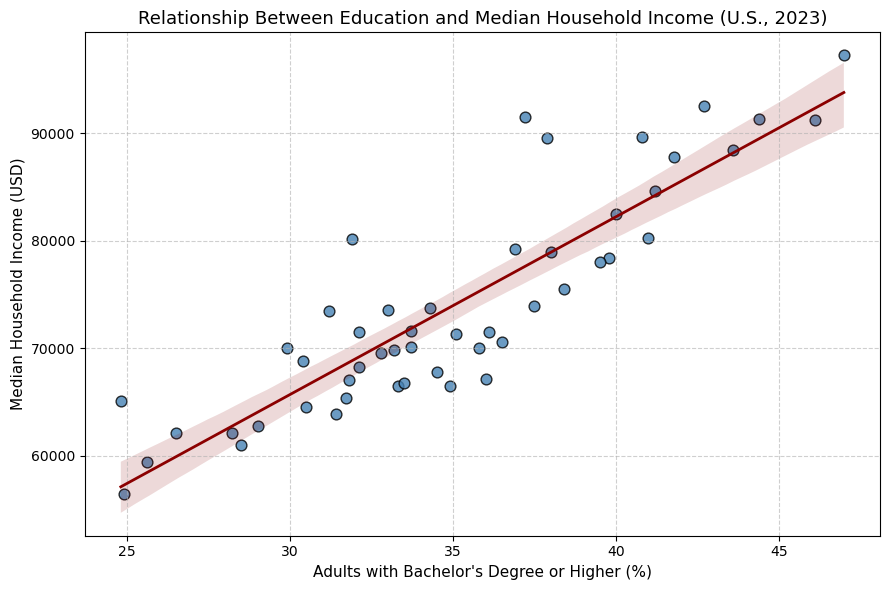

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Combine education and income data ---
edu_income = pd.merge(edu_df, income_df, on="State")

# --- Create scatter plot ---
plt.figure(figsize=(9, 6))
sns.regplot(
    data=edu_income,
    x="Bachelors_or_Higher",
    y="Median_Income",
    scatter_kws={"s": 60, "color": "steelblue", "edgecolor": "black", "alpha": 0.8},
    line_kws={"color": "darkred", "linewidth": 2}
)

# --- Labels and title ---
plt.title("Relationship Between Education and Median Household Income (U.S., 2023)", fontsize=13)
plt.xlabel("Adults with Bachelor's Degree or Higher (%)", fontsize=11)
plt.ylabel("Median Household Income (USD)", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Analysis: Relationship Between Education and Median Household Income (U.S., 2023)

The scatter plot demonstrates a **strong positive correlation** between educational attainment and household income across U.S. states.  
States with higher percentages of adults holding a bachelor’s degree or higher tend to report significantly greater median household incomes.

For instance, states such as **Massachusetts, Maryland, and Colorado** show both the highest education levels (over 40%) and the highest median incomes (above \$85,000).  
In contrast, states with lower education rates—like **Mississippi, Arkansas, and West Virginia**—cluster near the bottom left, indicating lower income levels.

The red regression line confirms this relationship statistically: as the share of college-educated adults increases, median household income rises in near-linear fashion.  
This relationship underscores how education functions as a key driver of **economic prosperity** and **regional inequality**, reinforcing the importance of educational access as a determinant of financial well-being.


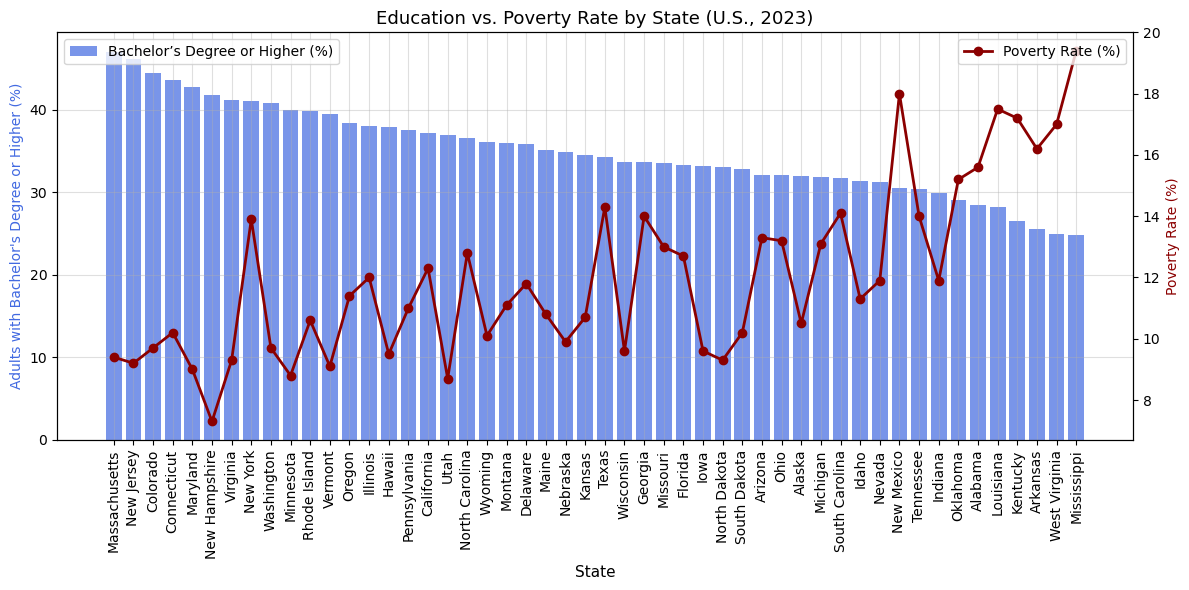

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Combine education and poverty data ---
edu_pov = pd.merge(edu_df, poverty_df, on="State")

# --- Sort by education level ---
edu_pov_sorted = edu_pov.sort_values("Bachelors_or_Higher", ascending=False)

# --- Plot side-by-side bars ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: education (%)
ax1.bar(
    edu_pov_sorted["State"],
    edu_pov_sorted["Bachelors_or_Higher"],
    color="royalblue",
    alpha=0.7,
    label="Bachelor’s Degree or Higher (%)"
)

# Right y-axis: poverty rate (%)
ax2 = ax1.twinx()
ax2.plot(
    edu_pov_sorted["State"],
    edu_pov_sorted["Poverty_Rate"],
    color="darkred",
    linewidth=2,
    marker="o",
    label="Poverty Rate (%)"
)

# --- Styling ---
ax1.set_title("Education vs. Poverty Rate by State (U.S., 2023)", fontsize=13)
ax1.set_xlabel("State", fontsize=11)
ax1.set_ylabel("Adults with Bachelor's Degree or Higher (%)", color="royalblue")
ax2.set_ylabel("Poverty Rate (%)", color="darkred")
ax1.tick_params(axis="x", rotation=90)
ax1.grid(alpha=0.4)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


### Analysis: Education and Poverty Rate (U.S., 2023)

The combined bar-and-line chart highlights a clear **inverse relationship** between educational attainment and poverty rates across U.S. states.  
States with a higher proportion of adults holding a bachelor’s degree or higher tend to experience **significantly lower poverty levels**.

For example, **Massachusetts, Connecticut, and Maryland** exhibit the highest education levels—over 40% of adults hold a degree—while maintaining poverty rates below 10%.  
Conversely, **Mississippi, Arkansas, and West Virginia**, with college completion rates around 25%, show poverty rates that exceed 17%.

The divergence between the blue bars and red line visually demonstrates this pattern: as educational attainment rises, poverty declines.  
This relationship suggests that education functions not only as a **personal income driver**, but also as a **structural buffer against poverty**, reinforcing the importance of equitable access to higher education in reducing economic disparities.


Pearson correlation: -0.750
R-squared: 0.562
P-value: 3.6803e-10


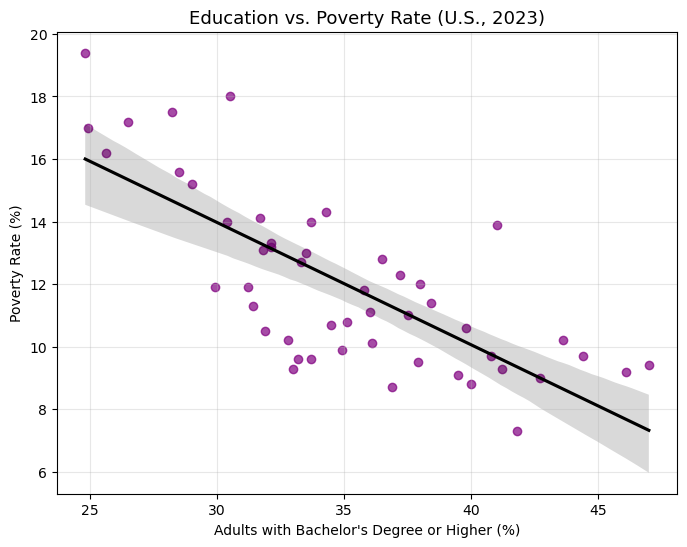

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Calculate correlation and linear regression
x = edu_pov["Bachelors_or_Higher"]
y = edu_pov["Poverty_Rate"]

correlation = x.corr(y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Pearson correlation: {correlation:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4e}")

# Visualization with regression line
plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, color="purple", scatter_kws={"alpha":0.7}, line_kws={"color":"black"})
plt.title("Education vs. Poverty Rate (U.S., 2023)", fontsize=13)
plt.xlabel("Adults with Bachelor's Degree or Higher (%)")
plt.ylabel("Poverty Rate (%)")
plt.grid(alpha=0.3)
plt.show()


### Analysis: Quantitative Relationship Between Education and Poverty

The statistical results confirm a **strong negative correlation** between educational attainment and poverty across U.S. states.  
The **Pearson correlation coefficient (r = –0.75)** indicates that as the share of adults with a bachelor’s degree or higher increases, poverty rates tend to decline substantially.

The model’s **R² value of 0.56** suggests that educational attainment alone explains about **56% of the variation** in state-level poverty rates — a substantial relationship given the complexity of socioeconomic conditions.  
The **p-value (3.68 × 10⁻¹⁰)** shows that this relationship is **highly statistically significant**, meaning it is extremely unlikely to have occurred by chance.

Together, these results empirically reinforce the visual trend observed earlier:  
higher education levels are associated with **greater economic stability** and **lower poverty prevalence**.  
This finding aligns with national survey data and provides quantitative evidence of the central role of education in reducing poverty across regions.


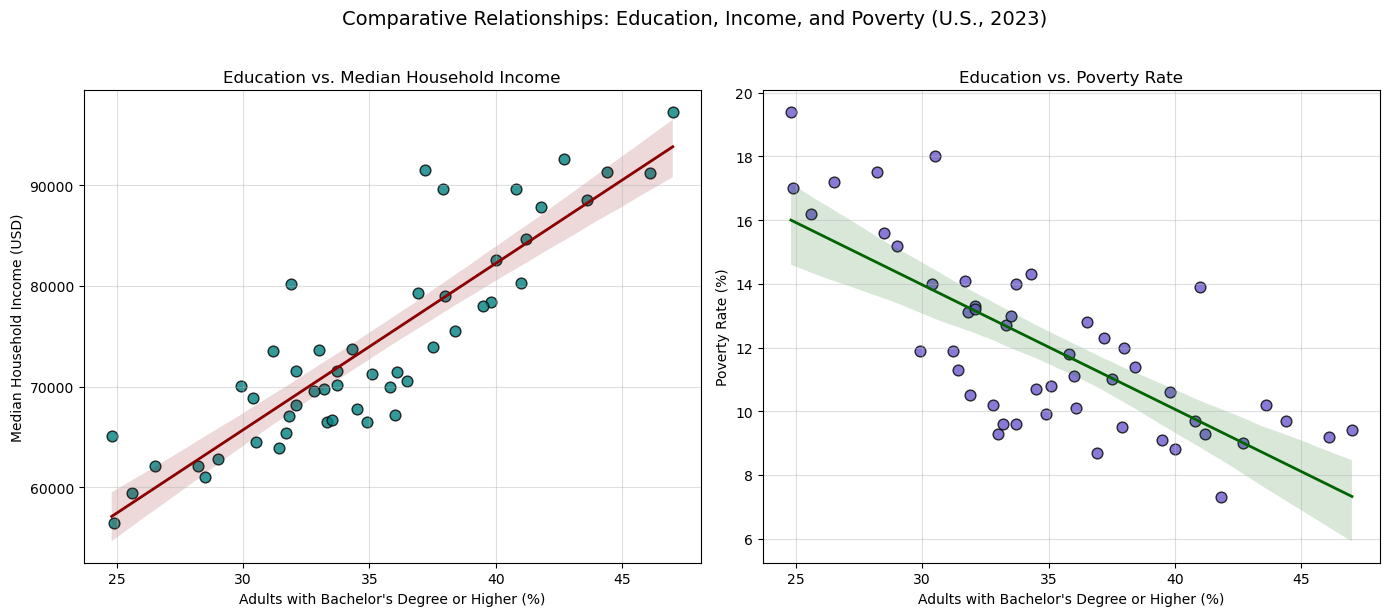

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare merged data ---
edu_full = pd.merge(edu_df, income_df, on="State")
edu_full = pd.merge(edu_full, poverty_df, on="State")

# --- Create figure with two panels ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Panel 1: Education vs. Median Income ---
sns.regplot(
    data=edu_full,
    x="Bachelors_or_Higher",
    y="Median_Income",
    scatter_kws={"s": 60, "color": "teal", "edgecolor": "black", "alpha": 0.8},
    line_kws={"color": "darkred", "linewidth": 2},
    ax=axes[0]
)
axes[0].set_title("Education vs. Median Household Income", fontsize=12)
axes[0].set_xlabel("Adults with Bachelor's Degree or Higher (%)")
axes[0].set_ylabel("Median Household Income (USD)")
axes[0].grid(alpha=0.4)

# --- Panel 2: Education vs. Poverty Rate ---
sns.regplot(
    data=edu_full,
    x="Bachelors_or_Higher",
    y="Poverty_Rate",
    scatter_kws={"s": 60, "color": "slateblue", "edgecolor": "black", "alpha": 0.8},
    line_kws={"color": "darkgreen", "linewidth": 2},
    ax=axes[1]
)
axes[1].set_title("Education vs. Poverty Rate", fontsize=12)
axes[1].set_xlabel("Adults with Bachelor's Degree or Higher (%)")
axes[1].set_ylabel("Poverty Rate (%)")
axes[1].grid(alpha=0.4)

plt.suptitle("Comparative Relationships: Education, Income, and Poverty (U.S., 2023)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


### Comparative Analysis: Education, Income, and Poverty

The side-by-side comparison highlights two distinct but related dynamics of socioeconomic inequality in the United States.

On the **left panel**, there is a clear *positive* relationship between educational attainment and median household income:  
states with a higher share of college-educated adults tend to have significantly higher incomes.  
The upward slope and tight clustering of points indicate a strong and consistent association, suggesting that access to higher education contributes directly to economic mobility and improved earning potential.

On the **right panel**, the pattern is the reverse. There is a *negative* relationship between education and poverty rate.  
States with lower levels of college education generally face higher poverty levels, confirming that education remains a critical protective factor against economic hardship.

Taken together, these two plots show that education not only raises household income but also reduces poverty, reinforcing its role as a structural determinant of economic well-being.  
The contrast between the two relationships offers a concise, data-driven view of how education shapes the broader landscape of social inequality across U.S. states.


 ## Conclusion and Policy Implications

This project visualized and quantified key socioeconomic relationships across the United States — focusing on education, income, and poverty.  
Through state-level analysis, the results consistently show that **education is a powerful determinant of economic outcomes**.

States with higher proportions of adults holding bachelor’s degrees or above exhibit:
- **Higher median household incomes**, reflecting improved employment access and wage opportunities.  
- **Lower poverty rates**, demonstrating the protective effect of education against financial instability.

These findings are consistent with broader national research emphasizing education’s role in shaping upward mobility and community resilience.  
From a policy perspective, the results suggest that **expanding access to affordable higher education** and **improving K–12 educational quality** can have long-term economic benefits — not only for individuals but also for regional development.

In short, **education investment is economic investment**.  
Mapping these spatial inequalities makes clear that closing educational gaps is essential to addressing persistent income and poverty disparities across the U.S.
